In [ ]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns',None)

In [ ]:
#read data

df = pd.read_csv("mushrooms.csv")

### About Data

In [ ]:
df.shape

(8124, 23)

In [ ]:
df.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g


### First Inspection

In [ ]:
#check missing value
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

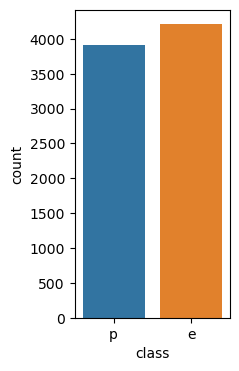

In [ ]:
# check distribution target variable
f,ax = plt.subplots(figsize=(2,4))
ax = sns.countplot(x = 'class', data = df)
plt.show()

#### first inspection at categorical var

In [ ]:
# check categorical variable
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 23 categorical variables

The categorical variables are : ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [ ]:
df[categorical].head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g


In [ ]:
# check nunique value in categorical var
print("Count of Unique Value in Categorical Variable:\n")
for var in categorical: 
    print(var)
    print(df[var].nunique())

Count of Unique Value in Categorical Variable:

class
2
cap-shape
6
cap-surface
4
cap-color
10
bruises
2
odor
9
gill-attachment
2
gill-spacing
2
gill-size
2
gill-color
12
stalk-shape
2
stalk-root
5
stalk-surface-above-ring
4
stalk-surface-below-ring
4
stalk-color-above-ring
9
stalk-color-below-ring
9
veil-type
1
veil-color
4
ring-number
3
ring-type
5
spore-print-color
9
population
6
habitat
7


#### first inspection on numerical variable

In [ ]:
# check numerical varible
num = df.select_dtypes(include='number').columns.to_list()

print('There are {} categorical variables\n'.format(len(num)))

print('The numerical variables are :', num)

There are 0 categorical variables

The numerical variables are : []


In [ ]:
df[num].head(2)

""
0
1


#### Insight:
> * dataset ini berisi 8124 baris & 23 kolom
> * dataset ini tidak memiliki missing value
> * dataset ini berisikan semua categorical kolom, tidak ada numerikal kolom. Sehingga memudahkan kami dalam melakukan pemodelan

### Pre Processing

**What We Do:**
>* dikarenakan pada df tidak terdapat missing value, maka tidak diperlukan *handling missing value*
>* melakukan encoding pada setiap categorical variable
>* melakukan *reduce dimensionality* pada df
>* 

#### Encoding

In [ ]:
# declare feature & target variable
X = df.drop(['class'], axis=1)
y = df[['class']]

In [ ]:
# encoding variabel kategorikal menggunakan one hot encoding
X = pd.get_dummies(X)

In [ ]:
# econding target variabel menggunakan label encoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

C:\Users\Robby\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_std=pd.DataFrame(std.fit_transform(X),index=X.index,columns=X.columns)

In [ ]:
X_std.describe()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8124.0,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03
mean,-7.070921e-15,2.037832e-15,1.264433e-14,-6.687966e-15,-5.169001e-15,-6.764653e-16,8.706313e-15,1.393666e-15,1.902803e-14,-5.463776e-15,6.061655e-15,8.671397e-16,2.405285e-14,4.604583e-15,-1.657791e-15,2.584234e-16,3.124704e-15,1.814478e-15,-5.511935e-15,-1.284814e-14,1.797252e-14,-1.797258e-14,-6.600559e-15,-1.949040e-16,2.427699e-14,-6.600559e-15,4.520062e-15,5.143705e-15,-1.491129e-14,-2.435483e-14,-2.355675e-14,2.478055e-14,-2.478055e-14,-8.373506e-15,8.422977e-15,-8.636726e-15,8.636999e-15,9.416260e-15,8.516985e-15,-1.054193e-15,-3.948822e-15,-1.864554e-14,1.570124e-15,-1.312043e-14,-6.574600e-15,-6.827499e-16,1.107359e-14,-4.26092

In [ ]:
X_std.shape

(8124, 117)

In [ ]:
# Building Principal Components
from sklearn.decomposition import PCA

pca = PCA(n_components = 90 )
pca.fit(X_std)
PC = pca.transform(X_std)

In [ ]:
# cummulative variance explained ratio
cum_var_exp = pca.explained_variance_ratio_
np.cumsum(cum_var_exp)

array([0.08891017, 0.17016491, 0.24220092, 0.30078742, 0.35266879,
       0.39660728, 0.4371384 , 0.46545556, 0.48901363, 0.51139009,
       0.53078379, 0.5494274 , 0.56739994, 0.58318516, 0.59749891,
       0.61088347, 0.62289769, 0.63428817, 0.64558561, 0.65650712,
       0.66698205, 0.67684526, 0.68661936, 0.6961464 , 0.70564094,
       0.71491949, 0.72417795, 0.73334518, 0.7424123 , 0.75119272,
       0.7599165 , 0.76858843, 0.77726035, 0.78589806, 0.79447168,
       0.80297808, 0.81132811, 0.81947548, 0.82750694, 0.83545002,
       0.84311759, 0.85064894, 0.85784496, 0.86494993, 0.87189253,
       0.87868566, 0.88536752, 0.89175075, 0.89795517, 0.90399766,
       0.91000135, 0.9157198 , 0.92132365, 0.92670415, 0.9319021 ,
       0.93697152, 0.94172771, 0.94619489, 0.95048449, 0.95464493,
       0.9587438 , 0.96255306, 0.96608447, 0.96951017, 0.97279248,
       0.97576482, 0.97867266, 0.98142689, 0.98412344, 0.98658919,
       0.98874586, 0.99071588, 0.99254835, 0.99417358, 0.99563

### Building Model

#### train test split

In [ ]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(PC, y, test_size=0.2, random_state=0)

In [ ]:
# dapat dilihat bahwa disini kita hanya menggunaan 90 kolom dari 117
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)

Shape of Training Data (6499, 90)
Shape of Testing Data (1625, 90)


#### Building Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#Using the Decision Tree Classifier with splitting criterion as Gini impurity, the maximum depth of the tree is 3.
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 5)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

<function matplotlib.pyplot.show(close=None, block=None)>

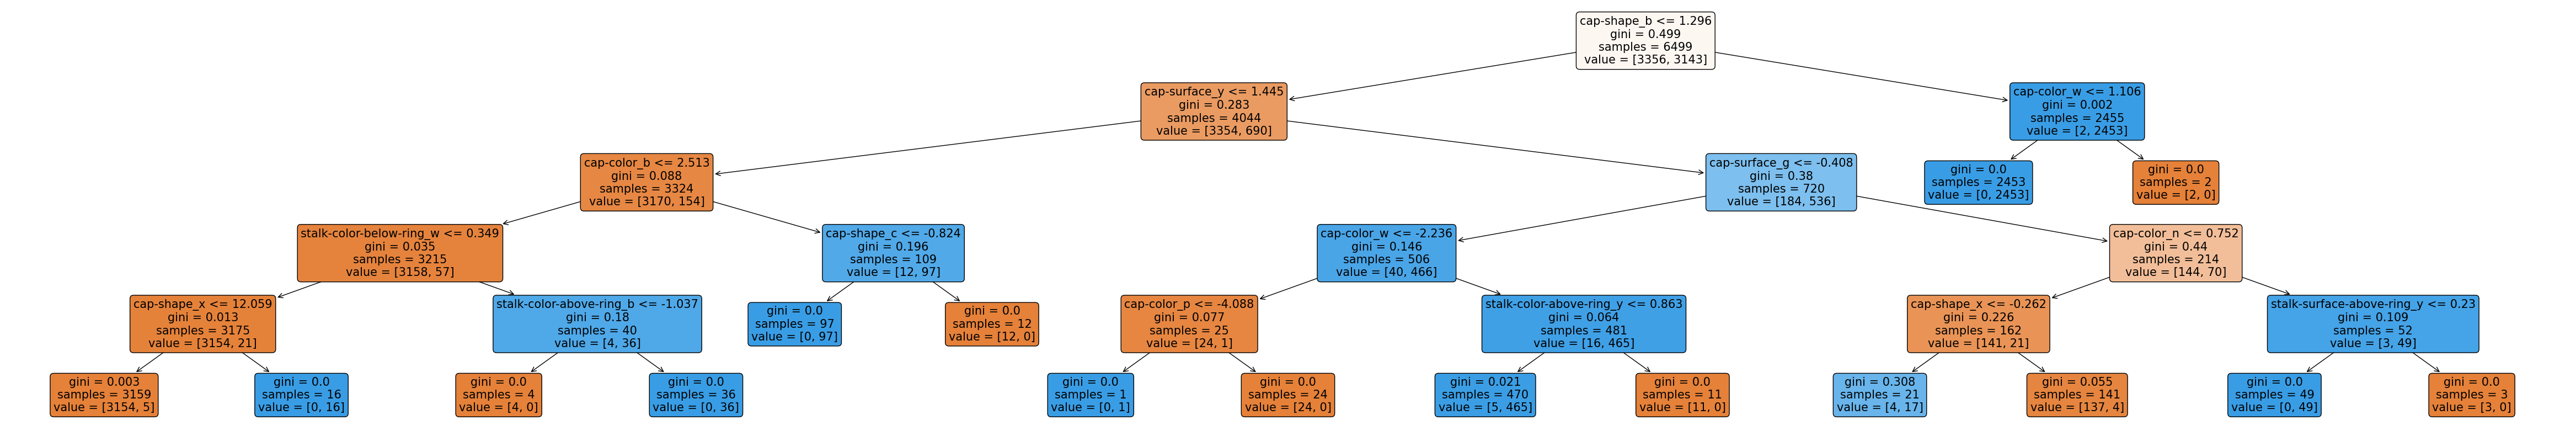

In [ ]:
# filled = True, We do want values in the nodes to be filled out
# rounded =True, We want the edges of the nodes or the terminal loads to be rounded and not sharp

import matplotlib.pyplot as plt
plt.figure(figsize=(60,10))
#_ = tree.plot_tree(regr, feature_names=X_all.columns, filled=True)
tree.plot_tree(clf_gini,filled=True,rounded=True,feature_names=X_std.columns,fontsize=15)
plt.show

In [ ]:
#Predict the values 
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
#Predict the value using X train for accuracy comparision 
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 0, ..., 0, 0, 0])

#### Evaluation Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score

from sklearn import metrics
from sklearn.metrics import confusion_matrix

C:\Users\Robby\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


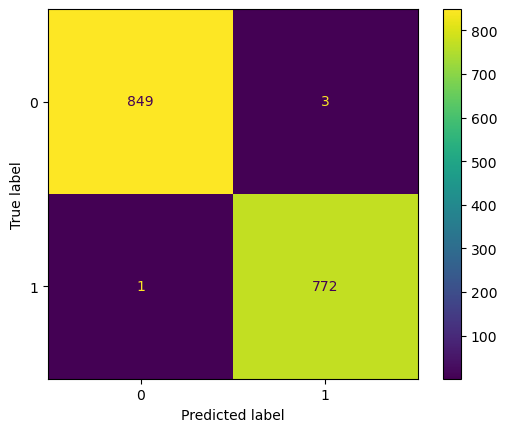

In [ ]:
metrics.plot_confusion_matrix(clf_gini,X_test,y_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gini))
print("Precision",metrics.precision_score(y_test,y_pred_gini))
print("Recall",metrics.recall_score(y_test,y_pred_gini))
print("f1_score",metrics.f1_score(y_test,y_pred_gini))# calculated using respective function

Accuracy: 0.9975384615384615
Precision 0.9961290322580645
Recall 0.9987063389391979
f1_score 0.9974160206718347


In [ ]:
# display predict probability
y_pred_prob = clf_gini.predict_proba(PC)[:, 1]
df['pred_prob']=pd.DataFrame(y_pred_prob)

In [ ]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,pred_prob
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,0.989362
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,0.001583
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,0.001583
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,0.989362
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,0.001583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l,0.001583
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l,0.001583
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l,0.001583
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l,1.000000
